In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
import seaborn as sns
import joblib
%matplotlib inline

In [2]:
def read_data(file_path):
    """
    Read data from a CSV file into a pandas DataFrame.
    
    """
    try:
        df = pd.read_csv(file_path)
        return df
    except FileNotFoundError:
        print("Error: File not found.")
        return None
    
processed_datafarme = read_data('../data/processed/train_model_data.csv')

processed_datafarme.head(3)

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,...,JobRole_Healthcare Representative,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,0.446350,1,0.742527,-1.010909,2,-1.731462,2,0,1.383138,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.322365,0,-1.297775,-0.147150,1,-1.730284,3,1,-0.240677,2,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.008343,1,1.414363,-0.887515,2,-1.729105,4,1,1.284725,2,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [3]:
def split_data(df, target_column):
   
    x = df.drop(target_column, axis=1)  # Features
    y = df[target_column]  # Target variable
    return x, y

x , y = split_data(processed_datafarme,'Attrition')



In [4]:
y

0       1
1       0
2       1
3       0
4       0
       ..
2935    0
2936    0
2937    0
2938    0
2939    0
Name: Attrition, Length: 2940, dtype: int64

In [5]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=1)

# Print the shapes of the train and test sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (2058, 36)
X_test shape: (882, 36)
y_train shape: (2058,)
y_test shape: (882,)


In [6]:

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'lbfgs', 'saga'],
    'max_iter': [ 1000],
    'tol': [1e-3, 1e-4, 1e-5],
    # Add other parameters if needed
}

# Create a logistic regression model
logistic = LogisticRegression()

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(logistic, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

c:\Users\samee\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\samee\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\samee\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\samee\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\samee\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\samee\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

{'C': 10, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs', 'tol': 0.001}


In [7]:
logistic.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [8]:
logistic.fit(X_train, y_train)
MODEL_TRAIN_SCORE = logistic.score(X_train, y_train)

print(f"Training score for Model: {MODEL_TRAIN_SCORE * 100:.2f}%")

#test model

TEST_MODEL_SCORE = logistic.score(X_test, y_test)

print(f"Testing score for Model: {TEST_MODEL_SCORE * 100:.2f}%")

Training score for Model: 88.58%
Testing score for Model: 87.87%


c:\Users\samee\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [9]:
values = x.loc[1000].values
print(values)

pred = y.loc[1000]
print(pred)

[ 1.65087077 -1.34983575 -0.14714972  4.         -0.55319585  3.
  0.         -0.58512238  3.          1.          0.42863532  8.5
  0.         13.          3.          0.          2.          1.
  0.          0.          0.          0.          0.          0.
  1.          0.          0.          1.          0.          0.
  0.          0.          0.          0.          1.          0.        ]
0


In [10]:
logistic.predict([values])

c:\Users\samee\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [11]:
y_pred=logistic.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [12]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[714,  15],
       [ 92,  61]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted label')

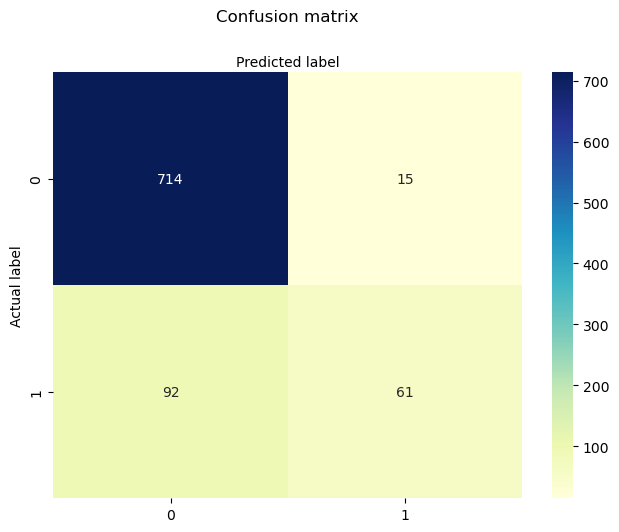

In [13]:
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [14]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8786848072562359
Precision: 0.8026315789473685
Recall: 0.39869281045751637


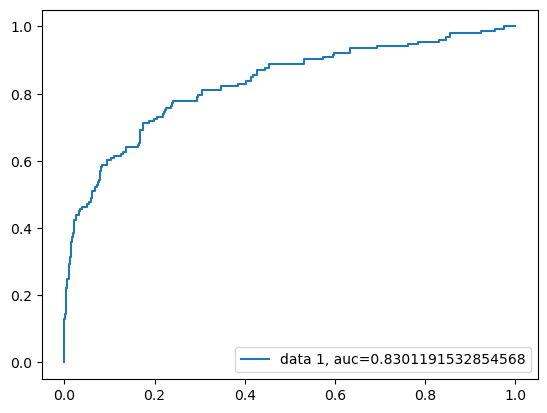

In [15]:
y_pred_proba = logistic.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [20]:
joblib.dump(logistic, '../models/logistic_model.pkl')

['../models/logistic_model.pkl']